# Investigation: Timing of Ads

## Did the candidates air more ads during a specific time of day?

In [1]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from awesome_puppies import ads_df as df
from awesome_puppies import votes_df
from awesome_puppies import groupby_agg
from awesome_puppies import regions, region_string

In [3]:
ad_direct = '../../../datasets/Political_TV_Ad_Archive/'
vote_direct = '../../../datasets/MIT_Election_Lab/'

In [4]:
regions()

['boston_region',
 'cedar_rapids_region',
 'cleveland_region',
 'denver_region',
 'las_vegas_region',
 'milwaukee_region',
 'new_york_city_region',
 'philadelphia_region',
 'phoenix_region',
 'raleigh_region',
 'san_francisco_region',
 'tampa_region',
 'washington_dc_region']

In [5]:
help(region_string)

Help on function region_string in module awesome_puppies:

region_string(region_id)
    Return the display string for a region_id string.



In [6]:
region_string(regions()[0])

'Boston Region'

In [7]:
df.head()

,network,region_id,program,program_type,start_utc,end_utc,archive_id,embed_url,sponsors,sponsor_types,subjects,candidates,message,beneficiary,start_time,end_time,date,day_of_week,air_time,duration
0,KLAS,las_vegas_region,8 News Now at 5 PM,news,2016-09-09 00:12:59+00:00,2016-09-09 00:13:29+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,pro,Clinton,2016-09-08 17:12:59,2016-09-08 17:13:29,2016-09-08,Thursday,17:12:59,0 days 00:00:30
1,WNCN,raleigh_region,North Carolina News at 500PM,news,2016-09-06 21:58:25+00:00,2016-09-06 21:58:55+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,pro,Clinton,2016-09-06 17:58:25,2016-09-06 17:58:55,2016-09-06,Tuesday,17:58:25,0 days 00:00:30
2,KLAS,las_vegas_region,Face the Nation,news,2016-09-04 16:24:25+00:00,2016-09-04 16:24:55+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,pro,Clinton,2016-09-04 09:24:25,2016-09-04 09:24:55,2016-09-04,Sunday,09:24:25,0 days 00:00:30
3,WFLA,tampa_region,Days of Our Lives,not news,2016-08-30 17:59:20+00:00,2016-08-30 17:59:50+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,pro,Clinton,2016-08-30 13:59:20,2016-08-30 13:59:50,2016-08-30,Tuesday,13:59:20,0 days 00:00:30
4,KSNV,las_vegas_region,The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22+00:00,2016-09-06 07:02:52+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,"Energy, China, Jobs",Hillary Clinton,pro,Clinton,2016-09-06 00:02:22,2016-09-06 00:02:52,2016-09-06,Tuesday,00:02:22,0 days 00:00:30


In [8]:
df.air_time.describe()

count        85133
unique       43030
top       18:59:02
freq            24
Name: air_time, dtype: object

In [9]:
df.dtypes

network                       object
region_id                     object
program                       object
program_type                  object
start_utc        datetime64[ns, UTC]
end_utc          datetime64[ns, UTC]
archive_id                    object
embed_url                     object
sponsors                      object
sponsor_types                 object
subjects                      object
candidates                    object
message                       object
beneficiary                   object
start_time            datetime64[ns]
end_time              datetime64[ns]
date                          object
day_of_week                   object
air_time                      object
duration             timedelta64[ns]
dtype: object

In [10]:
pd.to_datetime(df.air_time).dt.time

0        17:12:59
1        17:58:25
2        09:24:25
3        13:59:20
4        00:02:22
           ...   
85128    12:31:45
85129    07:58:56
85130    17:14:01
85131    07:16:35
85132    12:47:11
Name: air_time, Length: 85133, dtype: object

In [11]:
df['air_time_time'] = pd.to_datetime(df.air_time).dt.time
df['air_time_hour'] = pd.to_datetime(df.air_time).dt.hour
df['air_time_minute'] = pd.to_datetime(df.air_time).dt.minute
df['air_time_second'] = pd.to_datetime(df.air_time).dt.second

In [12]:
df.head(5)

,network,region_id,program,program_type,start_utc,end_utc,archive_id,embed_url,sponsors,sponsor_types,...,start_time,end_time,date,day_of_week,air_time,duration,air_time_time,air_time_hour,air_time_minute,air_time_second
0,KLAS,las_vegas_region,8 News Now at 5 PM,news,2016-09-09 00:12:59+00:00,2016-09-09 00:13:29+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,...,2016-09-08 17:12:59,2016-09-08 17:13:29,2016-09-08,Thursday,17:12:59,0 days 00:00:30,17:12:59,17,12,59
1,WNCN,raleigh_region,North Carolina News at 500PM,news,2016-09-06 21:58:25+00:00,2016-09-06 21:58:55+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,...,2016-09-06 17:58:25,2016-09-06 17:58:55,2016-09-06,Tuesday,17:58:25,0 days 00:00:30,17:58:25,17,58,25
2,KLAS,las_vegas_region,Face the Nation,news,2016-09-04 16:24:25+00:00,2016-09-04 16:24:55+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,...,2016-09-04 09:24:25,2016-09-04 09:24:55,2016-09-04,Sunday,09:24:25,0 days 00:00:30,09:24:25,9,24,25
3,WFLA,tampa_region,Days of Our Lives,not news,2016-08-30 17:59:20+00:00,2016-08-30 17:59:50+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,...,2016-08-30 13:59:20,2016-08-30 13:59:50,2016-08-30,Tuesday,13:59:20,0 days 00:00:30,13:59:20,13,59,20
4,KSNV,las_vegas_region,The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22+00:00,2016-09-06 07:02:52+00:00,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,...,2016-09-06 00:02:22,2016-09-06 00:02:52,2016-09-06,Tuesday,00:02:22,0 days 00:00:30,00:02:22,0,2,22


In [13]:
df['air_time_year'] = pd.to_datetime(df.start_time).dt.year
df['air_time_month'] = pd.to_datetime(df.start_time).dt.month
df['air_time_day'] = pd.to_datetime(df.start_time).dt.day

In [14]:
df[['start_time', 'air_time_year', 'air_time_month', 'air_time_day']].head(5)

,start_time,air_time_year,air_time_month,air_time_day
0,2016-09-08 17:12:59,2016,9,8
1,2016-09-06 17:58:25,2016,9,6
2,2016-09-04 09:24:25,2016,9,4
3,2016-08-30 13:59:20,2016,8,30
4,2016-09-06 00:02:22,2016,9,6


# Ads Aired at Hours of the Day

In [15]:
df.air_time_hour.describe()

count    85133.000000
mean        12.765849
std          6.537372
min          0.000000
25%          7.000000
50%         13.000000
75%         18.000000
max         23.000000
Name: air_time_hour, dtype: float64

In [16]:
df[df.region_id == 'boston_region'].air_time_hour

1909      8
1910      3
2635      4
2645     23
2670      8
         ..
83839    16
83864    18
83879     7
84414    17
85132    12
Name: air_time_hour, Length: 4897, dtype: int64

In [17]:
groupby_agg(df, groupby_list=['region_id', 'air_time_hour'], func='sum', fill_value=0)

air_time_minute                                           \
air_time_hour                     0      1     2      3      4      5      6    
region_id                                                                       
boston_region                   5576   1539   450    115   1600  12188  13017   
cedar_rapids_region             3998   1645   408     68   3649   5348   8428   
cleveland_region                9968   4263  1009    293   8343  19382  22894   
denver_region                   2835    543   353    161   3070   9685  10950   
las_vegas_region               10220   6416   445    216  14746  23427  29104   
milwaukee_region                3764   1133   738    210   1736   7668   5683   
new_york_city_region              99      0    35     75     37      0     14   
philadelphia_region            17464  11128  1850   1799  21850  27247  24372   
phoenix_region                  5147   4291  2537    202    320   2780   6492   
raleigh_region                  5921   2267   296    356   3325   6149  10091   
san_francisco_region            6465   2863  7100  12682  12203  12049  15454   
tampa_region                   14730   5395   618     66   4890  21123  27250   
washington_dc_region            2699    857   142    203    976   2253   2580   

                                           ... air_time_day               \
air_time_hour            7      8      9   ...           14    15     16   
region_id                                  ...                             
boston_region         10393  13157  11787  ...          850  1660   2085   
cedar_rapids_region   10236  10838   7510  ...         3034  3751   3220   
cleveland_region      18661  26526  18962  ...         3003  5571   7034   
denver_region          8580  10487   7706  ...          507  2435   3927   
las_vegas_region      22506  25790  17175  ...         3471  7678  11305   
milwaukee_region       7462   9071   5925  ...          653   944   3341   
new_york_city_region     69     24     32  ...           48    19     28   
philadelphia_region   20624  24730  28252  ...         4930  4434  10077   
phoenix_region         6054   7360   5859  ...         1251  1245   2094   
raleigh_region        10264  14924  15373  ...         3852  4720   3788   
san_francisco_region  16768  14841  12777  ...         5869  6908   7611   
tampa_region          24533  30602  19936  ...         3679  5223  10437   
washington_dc_region   3895   3225   2093  ...          230   290    700   

                                                                    
air_time_hour            17     18     19    20    21    22     23  
region_id                                                           
boston_region          4292   4634   6565   917  1079  2008   4671  
cedar_rapids_region    6304   7510   1073  1104  4145  6766   5349  
cleveland_region      10983  15388  13209  3045  2689  6148  13018  
denver_region          4763   4745    761   939  2147  4676   2448  
las_vegas_region      10835  14244   9548  2159  2892  6273   7679  
milwaukee_region       5259   5886    849   850  2032  4359   3817  
new_york_city_region      7     19      0    71    19    54      0  
philadelphia_region   12304  16273  13481  1722  1496  5324  11077  
phoenix_region         2911   4603   3327  1256  1510  2063   3612  
raleigh_region         8442   8442  12409  2200  2042  6317   5825  
san_francisco_region  10353  10865   5116  4894  3482  4734   8227  
tampa_region          17338  17571  15650  3426  2938  9074  12708  
washington_dc_region   1353   1628   1721   488   394   944   1416  

[13 rows x 120 columns]

In [18]:
air_hour_regions = groupby_agg(df, groupby_list=['region_id', 'air_time_hour'], func='size', fill_value=0)
air_hour_regions

air_time_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
region_id,,,,,,,,,,,,,,,,,,,,,
boston_region,214,88,17,7,40,363,375,294,376,312,...,67,116,157,345,344,492,78,85,156,361
cedar_rapids_region,171,52,15,3,74,152,253,267,285,178,...,200,252,212,419,500,81,80,269,458,346
cleveland_region,391,167,39,11,211,569,677,509,721,477,...,191,357,458,733,994,848,203,173,406,790
denver_region,110,43,10,8,69,276,343,235,295,182,...,70,228,338,388,395,82,104,224,373,204
las_vegas_region,361,283,32,10,356,698,877,609,725,426,...,235,498,781,711,963,637,159,202,433,521
milwaukee_region,137,51,28,8,46,221,180,214,272,163,...,65,99,256,380,433,72,64,160,326,285
new_york_city_region,2,0,2,2,3,0,2,3,3,1,...,4,1,2,1,1,0,5,1,5,0
philadelphia_region,617,445,109,43,544,776,735,568,670,697,...,331,309,657,859,1044,868,135,117,378,734
phoenix_region,191,143,129,9,9,82,173,163,202,173,...,74,79,126,199,283,196,71,87,123,206


In [19]:
df.region_id.value_counts()

philadelphia_region     12289
tampa_region            11980
las_vegas_region        10803
cleveland_region        10302
san_francisco_region     9425
raleigh_region           6714
cedar_rapids_region      5204
boston_region            4897
denver_region            4644
milwaukee_region         3904
phoenix_region           3200
washington_dc_region     1723
new_york_city_region       48
Name: region_id, dtype: int64

In [20]:
air_hour_regions_norm = air_hour_regions.T.transform(lambda x: x/x.sum())
air_hour_regions_norm

region_id,boston_region,cedar_rapids_region,cleveland_region,denver_region,las_vegas_region,milwaukee_region,new_york_city_region,philadelphia_region,phoenix_region,raleigh_region,san_francisco_region,tampa_region,washington_dc_region
air_time_hour,,,,,,,,,,,,,
0,0.043700,0.032859,0.037954,0.023686,0.033417,0.035092,0.041667,0.050208,0.059687,0.031576,0.024191,0.044157,0.063262
1,0.017970,0.009992,0.016210,0.009259,0.026196,0.013064,0.000000,0.036211,0.044687,0.014298,0.013263,0.019950,0.022055
2,0.003472,0.002882,0.003786,0.002153,0.002962,0.007172,0.041667,0.008870,0.040313,0.003426,0.027056,0.004007,0.005804
3,0.001429,0.000576,0.001068,0.001723,0.000926,0.002049,0.041667,0.003499,0.002812,0.002681,0.043289,0.000501,0.003482
4,0.008168,0.014220,0.020481,0.014858,0.032954,0.011783,0.062500,0.044267,0.002812,0.011171,0.040106,0.009182,0.013349
5,0.074127,0.029208,0.055232,0.059432,0.064612,0.056609,0.000000,0.063146,0.025625,0.024724,0.040743,0.046912,0.044109
6,0.076577,0.048616,0.065715,0.073859,0.081181,0.046107,0.041667,0.059810,0.054062,0.044087,0.051777,0.068781,0.045270
7,0.060037,0.051307,0.049408,0.050603,0.056373,0.054816,0.062500,0.046220,0.050937,0.043491,0.055385,0.055927,0.063262
8,0.076782,0.054766,0.069986,0.063523,0.067111,0.069672,0.062500,0.054520,0.063125,0.059279,0.051671,0.068114,0.058619


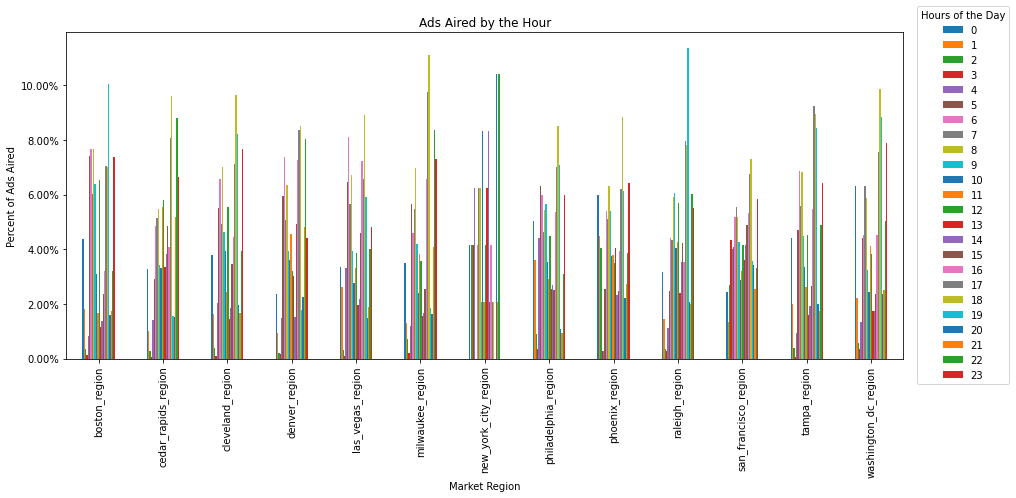

In [21]:
import matplotlib.ticker as mtick

ax = air_hour_regions_norm.transform(lambda x: x * 100) \
.T \
.plot(kind='bar', figsize=(15,6))

plt.title('Ads Aired by the Hour')
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title='Hours of the Day')
plt.ylabel('Percent of Ads Aired')
plt.xlabel('Market Region')

fmt = '{x:,.2f}%'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Comment/Uncomment to save plot
plt.savefig('../../../report/JL_figs/ads_aired_per_hour_BY-REGION.png', bbox_inches='tight')

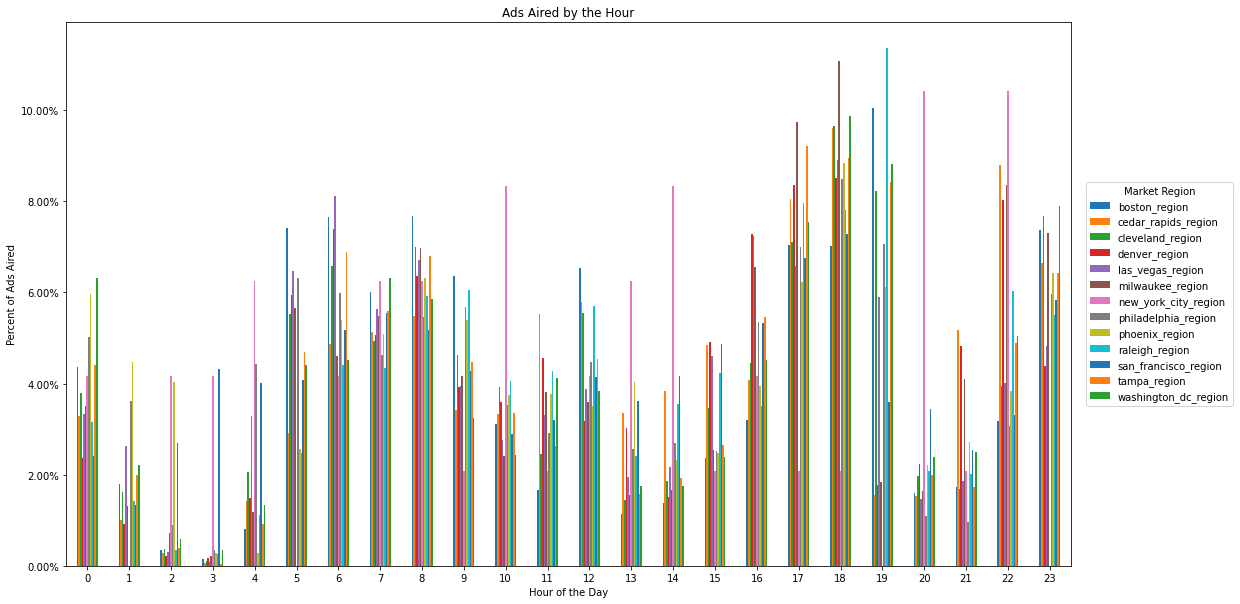

In [22]:
ax = air_hour_regions_norm.transform(lambda x: x * 100) \
.plot(kind='bar', figsize=(18,10))

plt.title('Ads Aired by the Hour')
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title='Market Region')
plt.ylabel('Percent of Ads Aired')
plt.xlabel('Hour of the Day')
plt.xticks(np.arange(0,24), rotation=0)

fmt = '{x:,.2f}%'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Comment/Uncomment to save plot
plt.savefig('../../../report/JL_figs/ads_aired_per_hour_BY-HOUR.png', bbox_inches='tight')

In [23]:
air_hour_regions_norm_m = air_hour_regions_norm.copy()
air_hour_regions_norm_m['average'] = air_hour_regions_norm.mean(axis=1)
air_hour_regions_norm_m

region_id,boston_region,cedar_rapids_region,cleveland_region,denver_region,las_vegas_region,milwaukee_region,new_york_city_region,philadelphia_region,phoenix_region,raleigh_region,san_francisco_region,tampa_region,washington_dc_region,average
air_time_hour,,,,,,,,,,,,,,
0,0.043700,0.032859,0.037954,0.023686,0.033417,0.035092,0.041667,0.050208,0.059687,0.031576,0.024191,0.044157,0.063262,0.040112
1,0.017970,0.009992,0.016210,0.009259,0.026196,0.013064,0.000000,0.036211,0.044687,0.014298,0.013263,0.019950,0.022055,0.018704
2,0.003472,0.002882,0.003786,0.002153,0.002962,0.007172,0.041667,0.008870,0.040313,0.003426,0.027056,0.004007,0.005804,0.011813
3,0.001429,0.000576,0.001068,0.001723,0.000926,0.002049,0.041667,0.003499,0.002812,0.002681,0.043289,0.000501,0.003482,0.008131
4,0.008168,0.014220,0.020481,0.014858,0.032954,0.011783,0.062500,0.044267,0.002812,0.011171,0.040106,0.009182,0.013349,0.021989
5,0.074127,0.029208,0.055232,0.059432,0.064612,0.056609,0.000000,0.063146,0.025625,0.024724,0.040743,0.046912,0.044109,0.044960
6,0.076577,0.048616,0.065715,0.073859,0.081181,0.046107,0.041667,0.059810,0.054062,0.044087,0.051777,0.068781,0.045270,0.058270
7,0.060037,0.051307,0.049408,0.050603,0.056373,0.054816,0.062500,0.046220,0.050937,0.043491,0.055385,0.055927,0.063262,0.053867
8,0.076782,0.054766,0.069986,0.063523,0.067111,0.069672,0.062500,0.054520,0.063125,0.059279,0.051671,0.068114,0.058619,0.063051


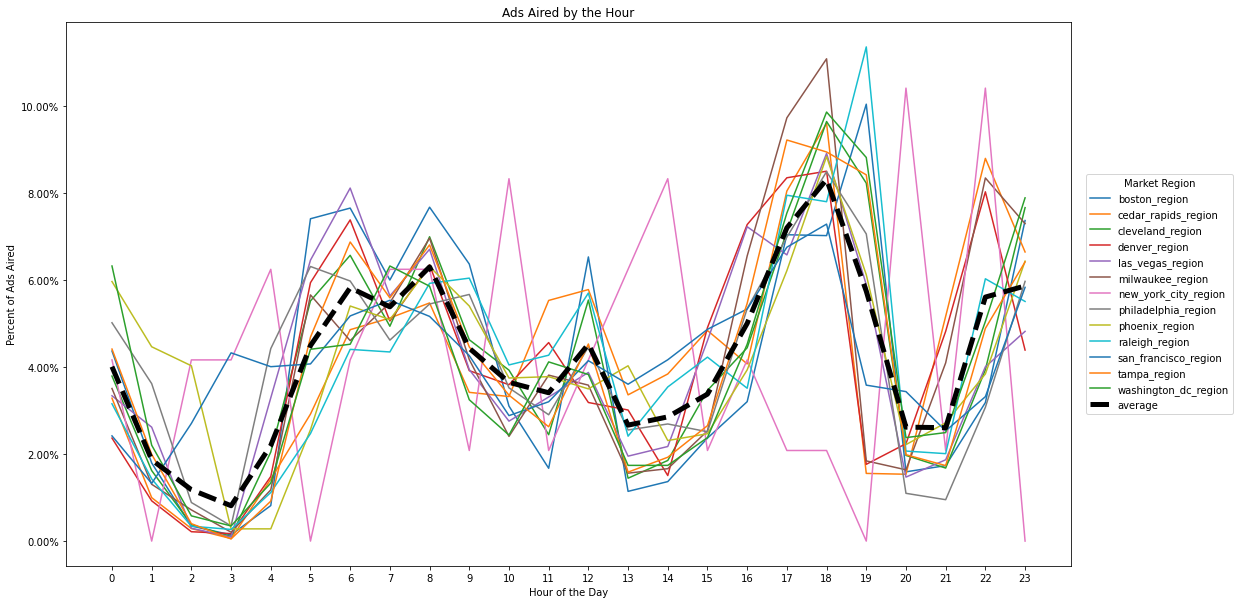

In [24]:
ax = air_hour_regions_norm_m.transform(lambda x: x * 100) \
.plot(kind='line', figsize=(18,10))

plt.title('Ads Aired by the Hour')
plt.ylabel('Percent of Ads Aired')
plt.xlabel('Hour of the Day')
plt.xticks(np.arange(0,24), rotation=0)

fmt = '{x:,.2f}%'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax.lines[-1].set_linewidth(5)
ax.lines[-1].set_linestyle('dashed')
ax.lines[-1].set_color('black')

plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title='Market Region')

# Comment/Uncomment to save plot
plt.savefig('../../../report/JL_figs/ads_aired_per_hour_lineplot_avg.png', bbox_inches='tight')

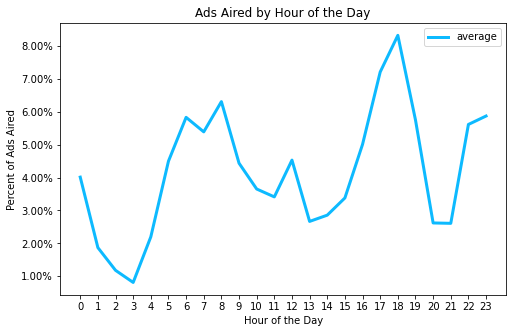

In [25]:
ax = air_hour_regions_norm_m['average'].transform(lambda x: x * 100) \
.plot(kind='line', figsize=(8,5))

plt.title('Ads Aired by Hour of the Day')
plt.ylabel('Percent of Ads Aired')
plt.xlabel('Hour of the Day')
plt.xticks(np.arange(0,24), rotation=0)

fmt = '{x:,.2f}%'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax.lines[0].set_linewidth(3)
# ax.lines[0].set_linestyle('dashed')
ax.lines[0].set_color('#0DBAFF')

plt.legend()

# Comment/Uncomment to save plot
plt.savefig('../../../report/JL_figs/ads_aired_per_hour_lineplot_agg.png', bbox_inches='tight')

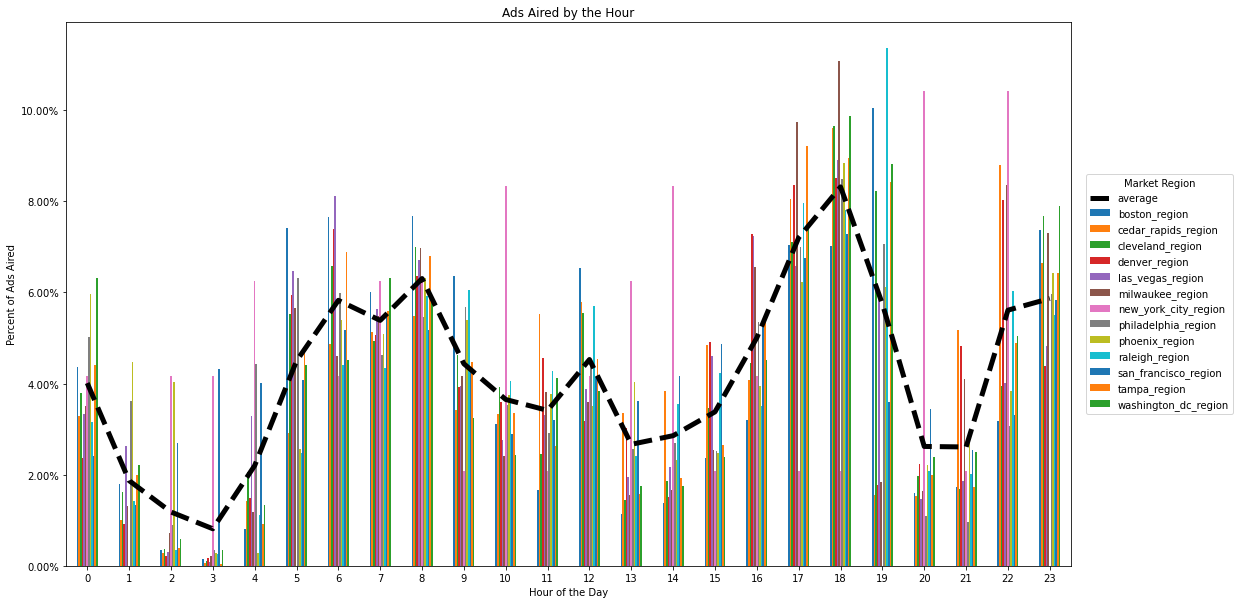

In [26]:
ax = air_hour_regions_norm_m.drop('average', axis=1).transform(lambda x: x * 100) \
.plot(kind='bar', figsize=(18,10))

air_hour_regions_norm_m['average'].transform(lambda x: x * 100).plot(kind='line', ax=ax)

plt.title('Ads Aired by the Hour')
plt.ylabel('Percent of Ads Aired')
plt.xlabel('Hour of the Day')
plt.xticks(np.arange(0,24), rotation=0)

fmt = '{x:,.2f}%'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax.lines[0].set_linewidth(5)
ax.lines[0].set_linestyle('dashed')
ax.lines[0].set_color('black')

plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title='Market Region')

# Comment/Uncomment to save plot
plt.savefig('../../../report/JL_figs/ads_aired_per_hour_barplot_avg.png', bbox_inches='tight')

In [27]:
groupby_agg(df, groupby_list=['air_time_hour'], func='size', fill_value=0)

air_time_hour
0     3272
1     1770
2      717
3      539
4     1938
5     4325
6     5301
7     4455
8     5351
9     4008
10    2834
11    2795
12    3945
13    1960
14    2129
15    3041
16    4459
17    6441
18    7410
19    5538
20    1641
21    1943
22    4049
23    5272
dtype: int64

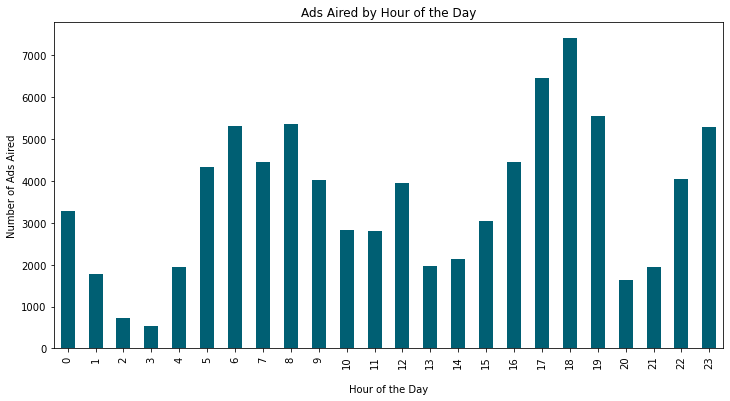

In [28]:
ax = groupby_agg(df, groupby_list=['air_time_hour'], func='size', fill_value=0) \
.plot(kind='bar', figsize=(12,6), color='#005F73')

plt.title('Ads Aired by Hour of the Day')
plt.ylabel('Number of Ads Aired')
plt.xlabel('\nHour of the Day')

# fmt = '{x:,.2f}%'
# tick = mtick.StrMethodFormatter(fmt)
# ax.yaxis.set_major_formatter(tick)

# Comment/Uncomment to save plot
plt.savefig('../../../report/JL_figs/ads_aired_per_hour_agg.png', bbox_inches='tight')

# Ads Aired on Weekends vs Weekdays

In [29]:
df.columns

Index(['network', 'region_id', 'program', 'program_type', 'start_utc',
       'end_utc', 'archive_id', 'embed_url', 'sponsors', 'sponsor_types',
       'subjects', 'candidates', 'message', 'beneficiary', 'start_time',
       'end_time', 'date', 'day_of_week', 'air_time', 'duration',
       'air_time_time', 'air_time_hour', 'air_time_minute', 'air_time_second',
       'air_time_year', 'air_time_month', 'air_time_day'],
      dtype='object')

In [30]:
df.day_of_week.value_counts()

Monday       14709
Wednesday    14516
Thursday     14182
Friday       14024
Tuesday      13726
Sunday        7340
Saturday      6636
Name: day_of_week, dtype: int64

## Trends by Day of the Week

In [31]:
days_of_week_counts = groupby_agg(df, groupby_list=['region_id', 'day_of_week'], func='size', fill_value=0)
days_of_week_counts = days_of_week_counts.reindex(['Sunday', 'Monday', 'Tuesday',
                                                   'Wednesday', 'Thursday', 'Friday', 'Saturday'],
                                                 axis=1)
days_of_week_counts

day_of_week,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
region_id,,,,,,,
boston_region,485,946,695,836,744,747,444
cedar_rapids_region,438,658,869,994,995,847,403
cleveland_region,850,1886,1956,1898,1541,1555,616
denver_region,395,872,673,875,820,687,322
las_vegas_region,734,1855,1901,1902,1796,1742,873
milwaukee_region,478,828,454,549,593,597,405
new_york_city_region,7,7,8,5,9,11,1
philadelphia_region,1186,1825,2096,2176,2081,1946,979
phoenix_region,324,624,475,468,499,516,294


In [32]:
days_of_week_counts.T.sum().sort_values()

region_id
new_york_city_region       48
washington_dc_region     1723
phoenix_region           3200
milwaukee_region         3904
denver_region            4644
boston_region            4897
cedar_rapids_region      5204
raleigh_region           6714
san_francisco_region     9425
cleveland_region        10302
las_vegas_region        10803
tampa_region            11980
philadelphia_region     12289
dtype: int64

In [33]:
sorted_regions = days_of_week_counts.T.sum().sort_values().index
sorted_regions

Index(['new_york_city_region', 'washington_dc_region', 'phoenix_region',
       'milwaukee_region', 'denver_region', 'boston_region',
       'cedar_rapids_region', 'raleigh_region', 'san_francisco_region',
       'cleveland_region', 'las_vegas_region', 'tampa_region',
       'philadelphia_region'],
      dtype='object', name='region_id')

In [34]:
days_of_week_norm = days_of_week_counts.T.transform(lambda x: x/x.sum())
days_of_week_norm

region_id,boston_region,cedar_rapids_region,cleveland_region,denver_region,las_vegas_region,milwaukee_region,new_york_city_region,philadelphia_region,phoenix_region,raleigh_region,san_francisco_region,tampa_region,washington_dc_region
day_of_week,,,,,,,,,,,,,
Sunday,0.099040,0.084166,0.082508,0.085056,0.067944,0.122439,0.145833,0.096509,0.101250,0.066577,0.081167,0.091486,0.078352
Monday,0.193179,0.126441,0.183071,0.187769,0.171712,0.212090,0.145833,0.148507,0.195000,0.186774,0.150769,0.179549,0.221706
Tuesday,0.141924,0.166987,0.189866,0.144918,0.175970,0.116291,0.166667,0.170559,0.148438,0.168305,0.155119,0.152087,0.107371
Wednesday,0.170717,0.191007,0.184236,0.188415,0.176062,0.140625,0.104167,0.177069,0.146250,0.182752,0.161167,0.154090,0.128265
Thursday,0.151930,0.191199,0.149583,0.176572,0.166250,0.151895,0.187500,0.169338,0.155938,0.164284,0.183660,0.157930,0.219385
Friday,0.152542,0.162759,0.150942,0.147933,0.161252,0.152920,0.229167,0.158353,0.161250,0.170241,0.182493,0.182304,0.190946
Saturday,0.090668,0.077440,0.059794,0.069337,0.080811,0.103740,0.020833,0.079665,0.091875,0.061066,0.085623,0.082554,0.053976


In [35]:
days_of_week_counts_sorted = days_of_week_counts.reindex(sorted_regions)
days_of_week_norm_sorted = days_of_week_norm.T.reindex(sorted_regions)

Text(0.5, 0, 'Day of the Week')

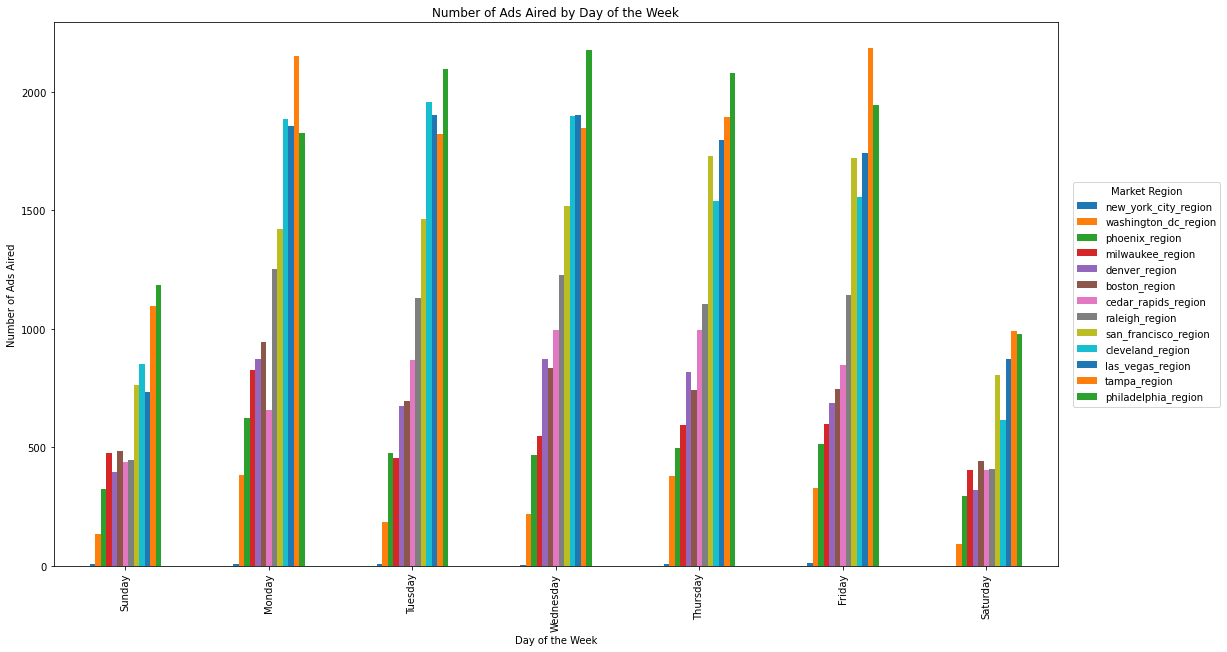

In [36]:
days_of_week_counts_sorted \
.T \
.plot(kind='bar', figsize=(18,10))

plt.title('Number of Ads Aired by Day of the Week')
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title='Market Region')
plt.ylabel('Number of Ads Aired')
plt.xlabel('Day of the Week')


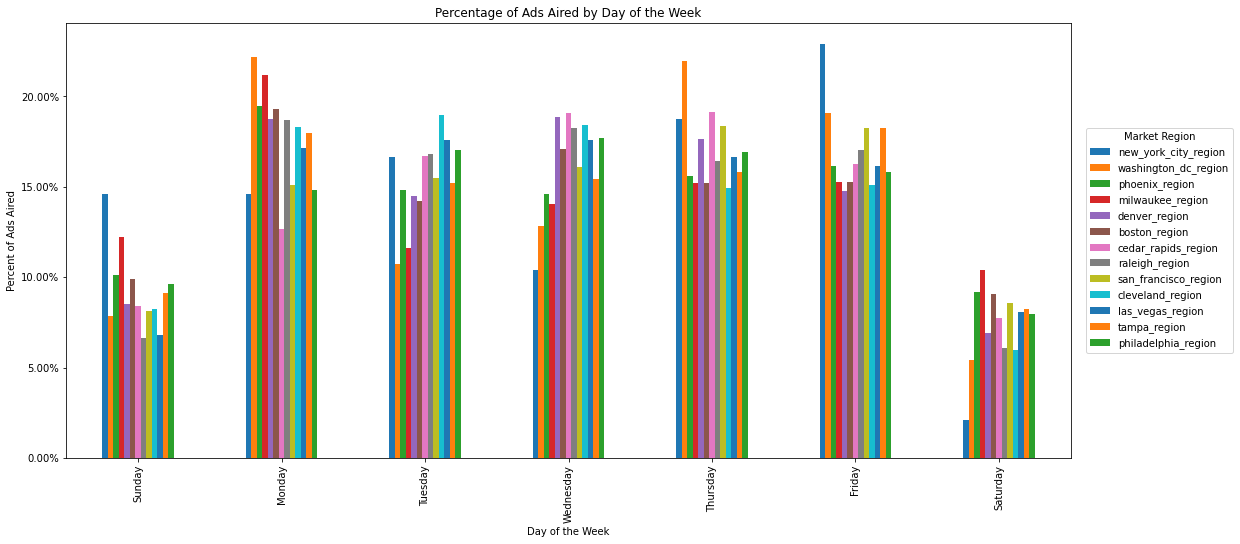

In [37]:
import matplotlib.ticker as mtick

ax = days_of_week_norm_sorted.transform(lambda x: x * 100) \
.T \
.plot(kind='bar', figsize=(18,8))

plt.title('Percentage of Ads Aired by Day of the Week')
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title='Market Region')
plt.ylabel('Percent of Ads Aired')
plt.xlabel('Day of the Week')

fmt = '{x:,.2f}%'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Comment/Uncomment to save plot
plt.savefig('../../../report/JL_figs/ads_aired_day_of_week_BY-DAY.png', bbox_inches='tight')

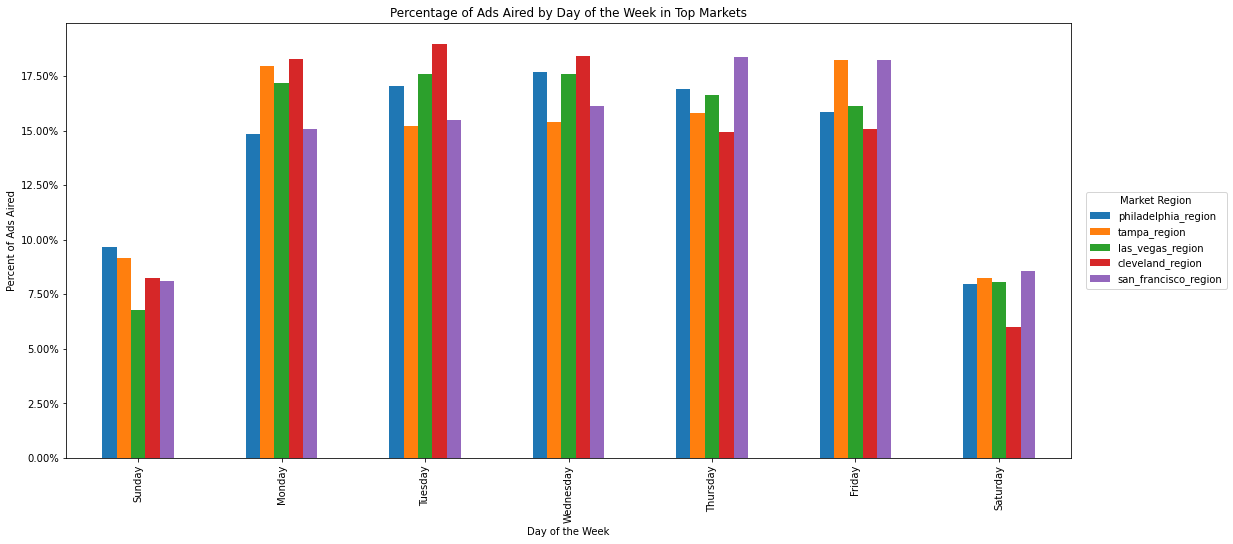

In [38]:
ax = days_of_week_norm_sorted.loc[['philadelphia_region',
                                  'tampa_region',
                                  'las_vegas_region',
                                  'cleveland_region',
                                  'san_francisco_region']] \
.transform(lambda x: x * 100) \
.T \
.plot(kind='bar', figsize=(18,8))

plt.title('Percentage of Ads Aired by Day of the Week in Top Markets')
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title='Market Region')
plt.ylabel('Percent of Ads Aired')
plt.xlabel('Day of the Week')

fmt = '{x:,.2f}%'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Comment/Uncomment to save plot
plt.savefig('../../../report/JL_figs/ads_aired_day_of_week_TOP-BY-DAY.png', bbox_inches='tight')

In [39]:
regions_c_dow = days_of_week_counts_sorted[::-1].T.corr()
regions_c_dow

region_id,philadelphia_region,tampa_region,las_vegas_region,cleveland_region,san_francisco_region,raleigh_region,cedar_rapids_region,boston_region,denver_region,milwaukee_region,phoenix_region,washington_dc_region,new_york_city_region
region_id,,,,,,,,,,,,,
philadelphia_region,1.000000,0.862718,0.955348,0.932909,0.925767,0.944154,0.960278,0.807922,0.902831,0.408081,0.765108,0.650483,0.610829
tampa_region,0.862718,1.000000,0.917375,0.873828,0.920395,0.956832,0.754302,0.912474,0.886657,0.724908,0.951774,0.862088,0.701325
las_vegas_region,0.955348,0.917375,1.000000,0.956080,0.920506,0.984475,0.879595,0.887661,0.924176,0.534044,0.865339,0.705618,0.509063
cleveland_region,0.932909,0.873828,0.956080,1.000000,0.808524,0.962313,0.803031,0.893537,0.906511,0.545662,0.854701,0.615100,0.512182
san_francisco_region,0.925767,0.920395,0.920506,0.808524,1.000000,0.913650,0.918266,0.781097,0.856455,0.488305,0.802212,0.804754,0.687675
raleigh_region,0.944154,0.956832,0.984475,0.962313,0.913650,1.000000,0.846948,0.942812,0.955719,0.641992,0.917248,0.766326,0.564362
cedar_rapids_region,0.960278,0.754302,0.879595,0.803031,0.918266,0.846948,1.000000,0.675519,0.827995,0.246041,0.610899,0.584634,0.545342
boston_region,0.807922,0.912474,0.887661,0.893537,0.781097,0.942812,0.675519,1.000000,0.960815,0.833017,0.953329,0.811116,0.445532
denver_region,0.902831,0.886657,0.924176,0.906511,0.856455,0.955719,0.827995,0.960815,1.000000,0.712263,0.891210,0.803598,0.476375


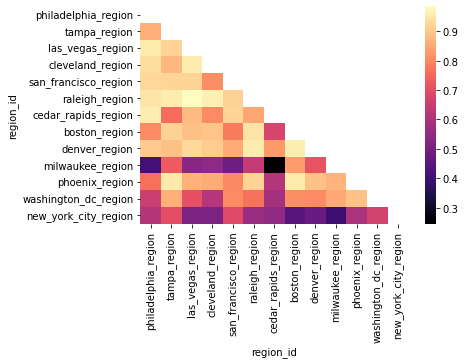

In [40]:
mask = np.triu(np.ones_like(regions_c_dow))

sns.heatmap(regions_c_dow,
            annot=False,
            mask=mask,
            cmap='magma')

plt.savefig('../../../report/JL_figs/ads_aired_region_corr.png', bbox_inches='tight')

### Ads by Day of Week (ignoring markets)

In [41]:
days_of_week_totals = df.day_of_week.value_counts().reindex(['Sunday', 'Monday', 'Tuesday', 
                                                               'Wednesday', 'Thursday', 'Friday', 'Saturday'])
days_of_week_totals

Sunday        7340
Monday       14709
Tuesday      13726
Wednesday    14516
Thursday     14182
Friday       14024
Saturday      6636
Name: day_of_week, dtype: int64

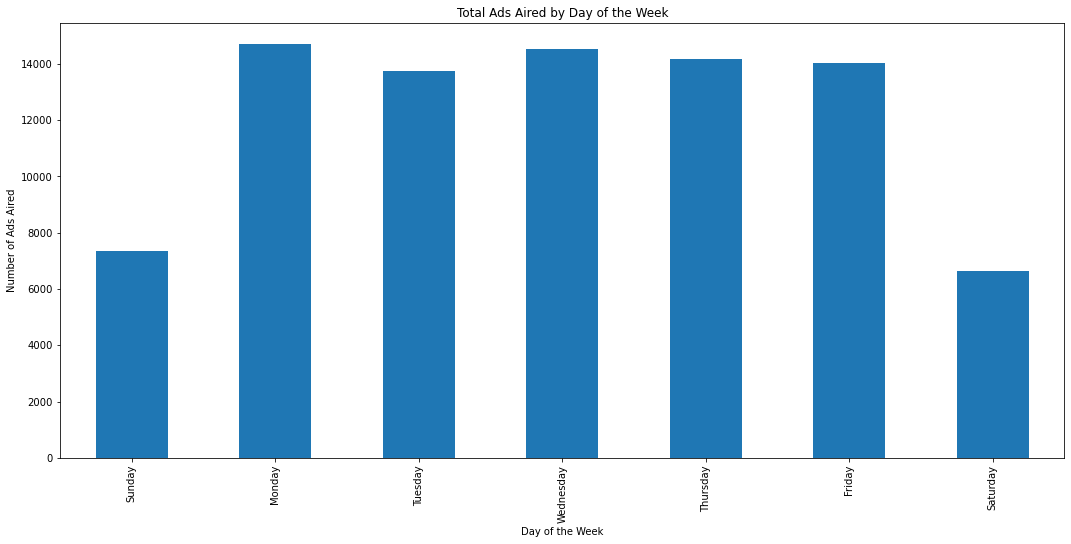

In [42]:
ax = days_of_week_totals \
.plot(kind='bar', figsize=(18,8))

plt.title('Total Ads Aired by Day of the Week')
plt.ylabel('Number of Ads Aired')
plt.xlabel('Day of the Week')

# Comment/Uncomment to save plot
plt.savefig('../../../report/JL_figs/total_ads_day_of_week.png', bbox_inches='tight')

In [43]:
days_of_week_by_cand = df.groupby(['beneficiary','day_of_week'])\
                         .size()\
                         .unstack()\
                         .reindex(columns=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])\
                         .T
days_of_week_by_cand

beneficiary,Clinton,Trump
day_of_week,,
Sunday,4291,3049
Monday,9108,5601
Tuesday,9203,4523
Wednesday,9382,5134
Thursday,8946,5236
Friday,9052,4972
Saturday,3999,2637


In [44]:
days_of_week_by_cand_norm = days_of_week_by_cand.transform(lambda x: x/x.sum())
days_of_week_by_cand_norm

beneficiary,Clinton,Trump
day_of_week,,
Sunday,0.079491,0.097875
Monday,0.168726,0.179796
Tuesday,0.170486,0.145191
Wednesday,0.173802,0.164805
Thursday,0.165725,0.168079
Friday,0.167689,0.159605
Saturday,0.074082,0.084649


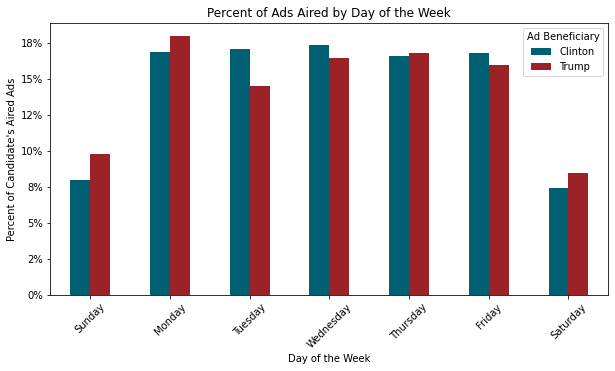

In [45]:
ax = days_of_week_by_cand_norm \
.transform(lambda x: x * 100) \
.plot(kind='bar', figsize=(10,5), color={'Clinton': '#005F73', 'Trump': '#9B2226'})

plt.title('Percent of Ads Aired by Day of the Week')
plt.ylabel("Percent of Candidate's Aired Ads")
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.legend(title='Ad Beneficiary')

fmt = '{x:,.0f}%'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Comment/Uncomment to save plot
plt.savefig('../../../report/JL_figs/perc_ads_day_of_week_by_cand.png', bbox_inches='tight')

# Number of Ads Over Time

## By Month

In [46]:
df.columns

Index(['network', 'region_id', 'program', 'program_type', 'start_utc',
       'end_utc', 'archive_id', 'embed_url', 'sponsors', 'sponsor_types',
       'subjects', 'candidates', 'message', 'beneficiary', 'start_time',
       'end_time', 'date', 'day_of_week', 'air_time', 'duration',
       'air_time_time', 'air_time_hour', 'air_time_minute', 'air_time_second',
       'air_time_year', 'air_time_month', 'air_time_day'],
      dtype='object')

In [47]:
df.dtypes

network                         object
region_id                       object
program                         object
program_type                    object
start_utc          datetime64[ns, UTC]
end_utc            datetime64[ns, UTC]
archive_id                      object
embed_url                       object
sponsors                        object
sponsor_types                   object
subjects                        object
candidates                      object
message                         object
beneficiary                     object
start_time              datetime64[ns]
end_time                datetime64[ns]
date                            object
day_of_week                     object
air_time                        object
duration               timedelta64[ns]
air_time_time                   object
air_time_hour                    int64
air_time_minute                  int64
air_time_second                  int64
air_time_year                    int64
air_time_month           

In [48]:
df.resample("M", on='start_time').sum()

,air_time_hour,air_time_minute,air_time_second,air_time_year,air_time_month,air_time_day
start_time,,,,,,
2016-06-30,9967,25977,25667,1764000,5250,12521
2016-07-31,23557,57318,52848,3854592,13384,35722
2016-08-31,149507,396527,340401,24379488,96744,240109
2016-09-30,281145,735229,617306,44089920,196830,347760
2016-10-31,407100,1043885,894090,63401184,314490,550216
2016-11-30,215519,564768,481027,34138944,186274,69333


In [49]:
df.air_time_month.value_counts()

10    31449
9     21870
11    16934
8     12093
7      1912
6       875
Name: air_time_month, dtype: int64

In [50]:
month_counts = df.resample("M", on='start_time').size()
month_counts

start_time
2016-06-30      875
2016-07-31     1912
2016-08-31    12093
2016-09-30    21870
2016-10-31    31449
2016-11-30    16934
Freq: M, dtype: int64

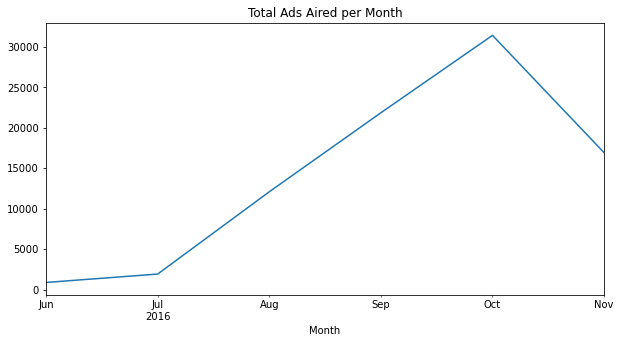

In [51]:
month_counts.plot(figsize=(10,5))
plt.title('Total Ads Aired per Month')
plt.xlabel('Month')

# Comment/Uncomment to save plot
plt.savefig('../../../report/JL_figs/total_ads_per_month.png', bbox_inches='tight')

## By Week

In [52]:
week_counts = df.resample("W", on='start_time').size()
week_counts

start_time
2016-06-05      113
2016-06-12      340
2016-06-19      183
2016-06-26       86
2016-07-03      197
2016-07-10      426
2016-07-17      258
2016-07-24      493
2016-07-31      691
2016-08-07      634
2016-08-14     2715
2016-08-21     2435
2016-08-28     4321
2016-09-04     3916
2016-09-11     5722
2016-09-18     4812
2016-09-25     4749
2016-10-02     5719
2016-10-09     6835
2016-10-16     5747
2016-10-23     6582
2016-10-30     9354
2016-11-06    15556
2016-11-13     3249
Freq: W-SUN, dtype: int64

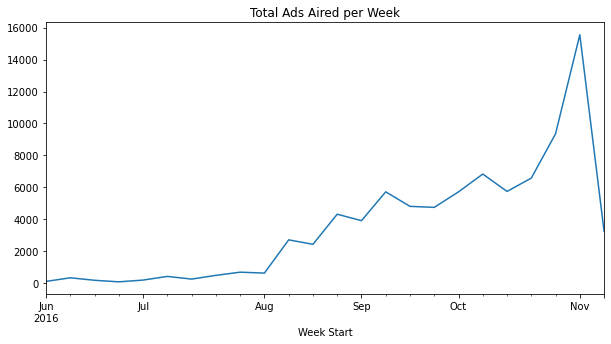

In [53]:
week_counts.plot(figsize=(10,5))
plt.title('Total Ads Aired per Week')
plt.xlabel('Week Start')

# Comment/Uncomment to save plot
plt.savefig('../../../report/JL_figs/total_ads_per_week.png', bbox_inches='tight')

### Weekly by Region

In [54]:
week_counts_regions = df.groupby('region_id').resample("W", on='start_time').size().unstack(fill_value=0).T
week_counts_regions

region_id,boston_region,cedar_rapids_region,cleveland_region,denver_region,las_vegas_region,milwaukee_region,new_york_city_region,philadelphia_region,phoenix_region,raleigh_region,san_francisco_region,tampa_region,washington_dc_region
start_time,,,,,,,,,,,,,
2016-06-05,0,0,0,0,0,0,0,1,0,0,110,0,2
2016-06-12,0,0,0,0,0,0,0,13,0,0,307,0,20
2016-06-19,0,0,0,0,0,0,0,3,0,0,179,0,1
2016-06-26,0,0,0,0,0,0,0,7,0,0,73,0,6
2016-07-03,0,0,0,0,0,0,0,3,0,0,192,0,2
2016-07-10,0,0,0,0,0,0,0,27,0,0,379,0,20
2016-07-17,0,0,0,0,0,0,0,1,0,0,256,0,1
2016-07-24,0,0,0,0,0,0,0,164,0,0,316,0,13
2016-07-31,4,0,0,0,0,0,1,263,0,0,423,0,0


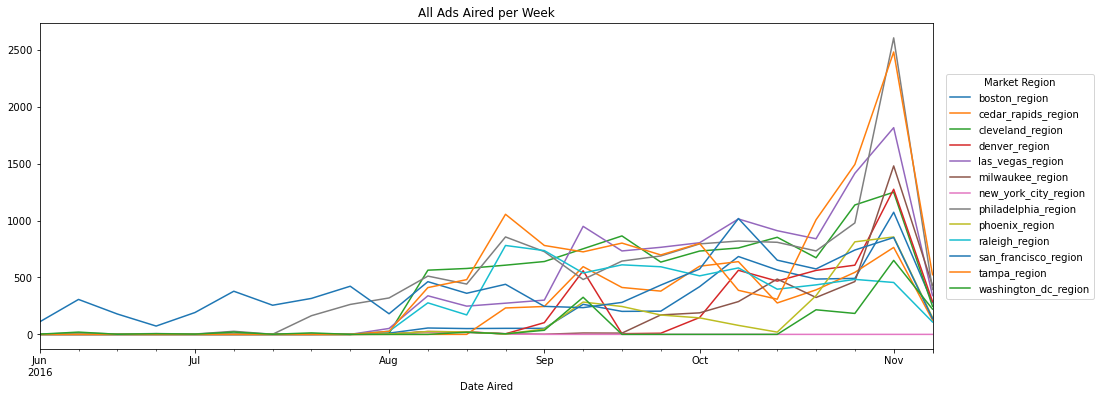

In [55]:
week_counts_regions.plot(figsize=(16,6))


plt.title('All Ads Aired per Week')
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title='Market Region')
# plt.ylabel('Ads Aired')
plt.xlabel('Date Aired')

# Comment/Uncomment to save plot
plt.savefig('../../../report/JL_figs/weekly_ads_by_region.png', bbox_inches='tight')

### Daily by Region

In [56]:
df.resample("2D", on='start_time').region_id

In [57]:
day_counts_regions = df.groupby('region_id').resample("D", on='start_time').size().unstack(fill_value=0).T
day_counts_regions[-15:]

region_id,boston_region,cedar_rapids_region,cleveland_region,denver_region,las_vegas_region,milwaukee_region,new_york_city_region,philadelphia_region,phoenix_region,raleigh_region,san_francisco_region,tampa_region,washington_dc_region
start_time,,,,,,,,,,,,,
2016-10-24,100,49,124,122,174,77,0,106,92,104,113,197,61
2016-10-25,56,83,197,105,248,78,0,157,181,95,129,237,19
2016-10-26,72,98,207,105,241,66,0,173,133,117,121,219,12
2016-10-27,72,111,190,97,257,54,0,163,113,83,135,255,29
2016-10-28,82,99,198,104,253,54,0,154,117,58,130,271,32
2016-10-29,45,49,102,37,140,63,0,107,84,13,47,151,15
2016-10-30,65,56,119,38,102,72,0,119,93,13,66,163,16
2016-10-31,83,79,223,93,302,172,0,256,183,71,83,297,29
2016-11-01,100,84,228,101,290,149,0,423,117,64,160,270,61


Text(0.5, 0, 'Date Aired')

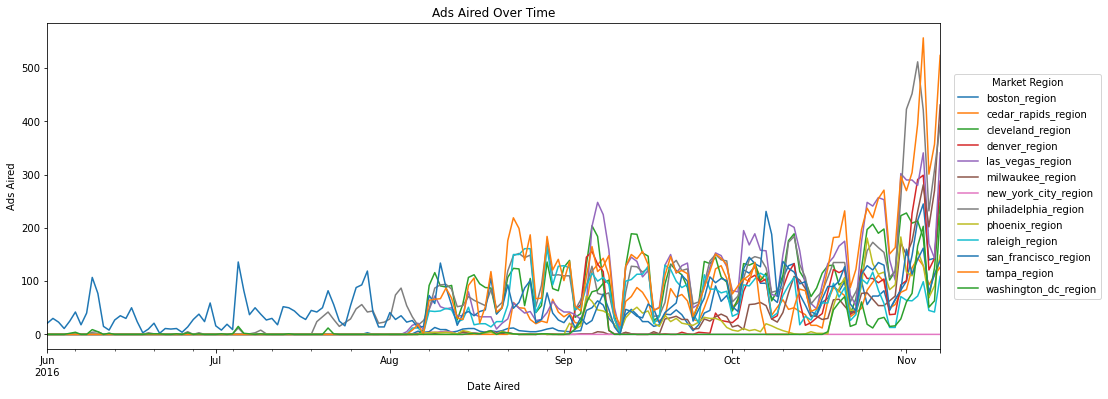

In [58]:
day_counts_regions.plot(figsize=(16,6))


plt.title('Ads Aired Over Time')
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title='Market Region')
plt.ylabel('Ads Aired')
plt.xlabel('Date Aired')




## Over Time By Candidate

In [59]:
cand_week_counts_regions = df.groupby(['beneficiary', 'region_id']) \
                             .resample("W", on='start_time') \
                             .size() \
                             .unstack(level=1)
cand_week_counts_regions

region_id               boston_region  cedar_rapids_region  cleveland_region  \
beneficiary start_time                                                         
Clinton     2016-06-05            NaN                  NaN               NaN   
            2016-06-12            NaN                  NaN               NaN   
            2016-06-19            NaN                  NaN               NaN   
            2016-06-26            NaN                  NaN               NaN   
            2016-07-03            NaN                  NaN               NaN   
            2016-07-10            NaN                  NaN               NaN   
            2016-07-17            NaN                  NaN               NaN   
            2016-07-24            NaN                  NaN               NaN   
            2016-07-31            3.0                  NaN               NaN   
            2016-08-07           11.0                  NaN               9.0   
            2016-08-14           55.0                  NaN             395.0   
            2016-08-21           49.0                  NaN             263.0   
            2016-08-28           53.0                231.0             306.0   
            2016-09-04           51.0                233.0             427.0   
            2016-09-11          130.0                357.0             537.0   
            2016-09-18          193.0                404.0             593.0   
            2016-09-25          197.0                374.0             554.0   
            2016-10-02          208.0                442.0             603.0   
            2016-10-09          269.0                372.0             552.0   
            2016-10-16          289.0                234.0             381.0   
            2016-10-23          202.0                272.0             280.0   
            2016-10-30          224.0                383.0             683.0   
            2016-11-06          598.0                475.0             772.0   
            2016-11-13          169.0                 36.0             163.0   
Trump       2016-06-05            NaN                  NaN               NaN   
            2016-06-12            NaN                  NaN               NaN   
            2016-06-19            NaN                  NaN               NaN   
            2016-06-26            NaN                  NaN               NaN   
            2016-07-03            NaN                  NaN               NaN   
            2016-07-10            NaN                  NaN               NaN   
            2016-07-17            NaN                  NaN               NaN   
            2016-07-24            NaN                  NaN               NaN   
            2016-07-31            1.0                  NaN               NaN   
            2016-08-07            0.0                  NaN               NaN   
            2016-08-14            1.0                  NaN             169.0   
            2016-08-21            2.0                  NaN             316.0   
            2016-08-28            0.0                  1.0             302.0   
            2016-09-04            2.0                 12.0             213.0   
            2016-09-11          134.0                238.0             215.0   
            2016-09-18            9.0                  8.0             272.0   
            2016-09-25            7.0                  6.0              81.0   
            2016-10-02          211.0                157.0             129.0   
            2016-10-09          415.0                267.0             207.0   
            2016-10-16          277.0                 42.0             472.0   
            2016-10-23          284.0                119.0             393.0   
            2016-10-30          268.0                162.0             454.0   
            2016-11-06          475.0                289.0             477.0   
            2016-11-13          110.0                 90.0              84.0   


In [60]:
clinton_week_reg = cand_week_counts_regions.loc['Clinton']
clinton_week_reg['Clinton_Average'] = clinton_week_reg.mean(axis=1)

trump_week_reg = cand_week_counts_regions.loc['Trump']
trump_week_reg['Trump_Average'] = trump_week_reg.mean(axis=1)

clinton_week_reg.fillna(value=0, inplace=True)
trump_week_reg.fillna(value=0, inplace=True)

print(clinton_week_reg.columns)
print(len(clinton_week_reg.columns))
clinton_week_reg

Index(['boston_region', 'cedar_rapids_region', 'cleveland_region',
       'denver_region', 'las_vegas_region', 'milwaukee_region',
       'new_york_city_region', 'philadelphia_region', 'phoenix_region',
       'raleigh_region', 'san_francisco_region', 'tampa_region',
       'washington_dc_region', 'Clinton_Average'],
      dtype='object', name='region_id')
14


region_id,boston_region,cedar_rapids_region,cleveland_region,denver_region,las_vegas_region,milwaukee_region,new_york_city_region,philadelphia_region,phoenix_region,raleigh_region,san_francisco_region,tampa_region,washington_dc_region,Clinton_Average
start_time,,,,,,,,,,,,,,
2016-06-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,1.0,45.500000
2016-06-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,150.0,0.0,14.0,58.000000
2016-06-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,28.0,0.0,1.0,10.666667
2016-06-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,23.0,0.0,3.0,10.333333
2016-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,119.0,0.0,1.0,40.333333
2016-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,155.0,0.0,3.0,54.000000
2016-07-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,230.0,0.0,1.0,77.333333
2016-07-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.0,257.0,0.0,0.0,137.000000
2016-07-31,3.0,0.0,0.0,0.0,0.0,0.0,0.0,191.0,0.0,0.0,261.0,0.0,0.0,113.750000


26


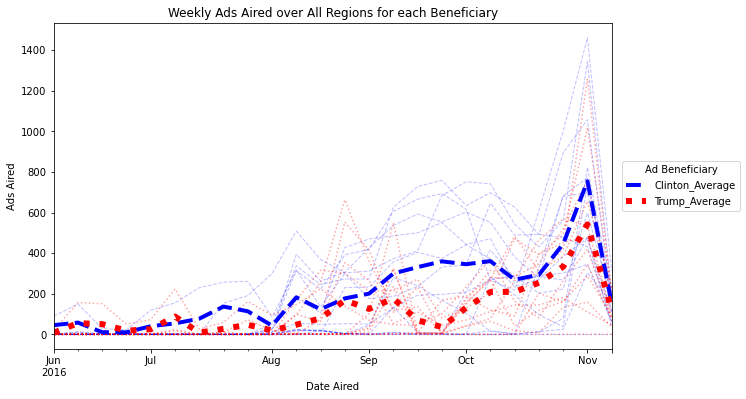

In [61]:
# Clinton Lines
ax = clinton_week_reg.drop(['Clinton_Average'], axis=1).plot(kind='line', figsize=(10,6))

    
# Trump Lines
trump_week_reg.drop(['Trump_Average'], axis=1).plot(ax=ax, kind='line')

print(len(ax.lines))

# Clinton Lines
for clinton_line in ax.lines[:14]:
    clinton_line.set_color('blue')
    clinton_line.set_linestyle('dashed')
    clinton_line.set_alpha(0.25)
    clinton_line.set_linewidth(1)
    
# Trump Lines
for trump_line in ax.lines[14:]:
    trump_line.set_color('red')
    trump_line.set_linestyle('dotted')
    trump_line.set_alpha(0.35)
    trump_line.set_linewidth(1.5)

# Clinton Average
clinton_week_reg['Clinton_Average'].plot(kind='line', ax=ax)
ax.lines[-1].set_color('blue')
ax.lines[-1].set_linewidth(4)
ax.lines[-1].set_linestyle('dashed')

# Trump Average
trump_week_reg['Trump_Average'].plot(kind='line', ax=ax)
ax.lines[-1].set_color('red')
ax.lines[-1].set_linewidth(6)
ax.lines[-1].set_linestyle('dotted')
    
# Title and Labels
plt.title('Weekly Ads Aired over All Regions for each Beneficiary')
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title='Ad Beneficiary',
           handles=ax.lines[-2:])
# ax.get_legend().remove()
plt.ylabel('Ads Aired')
plt.xlabel('Date Aired')

# Comment/Uncomment to save plot
plt.savefig('../../../report/JL_figs/beneficiary_weekly_ads_agg.png', bbox_inches='tight')


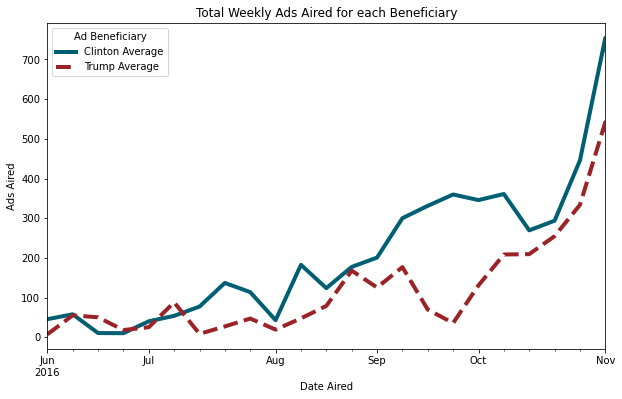

In [71]:

# Clinton Average
ax = clinton_week_reg['Clinton_Average'].plot(kind='line', figsize=(10,6))
ax.lines[-1].set_color('#005F73')
ax.lines[-1].set_linewidth(4)
ax.lines[-1].set_linestyle('solid')

# Trump Average
trump_week_reg['Trump_Average'].plot(kind='line', ax=ax)
ax.lines[-1].set_color('#9B2226')
ax.lines[-1].set_linewidth(4)
ax.lines[-1].set_linestyle('dashed')
    
# Title and Labels
plt.title('Total Weekly Ads Aired for each Beneficiary')
plt.legend(['Clinton Average', 'Trump Average'], loc='upper left', title='Ad Beneficiary')
# ax.get_legend().remove()
plt.ylabel('Ads Aired')
plt.xlabel('Date Aired')

# Limit x-axis range
plt.xlim([datetime.date(2016, 6, 1), datetime.date(2016, 11, 1)])

# Comment/Uncomment to save plot
plt.savefig('../../../report/JL_figs/beneficiary_weekly_ads.png')



### Weekly Ads for Candidates by Region

In [63]:
plot = cand_week_counts_regions.drop(['new_york_city_region'], axis=1).fillna(0).unstack().T
plot

beneficiary                      Clinton  Trump
region_id            start_time                
boston_region        2016-06-05      0.0    0.0
                     2016-06-12      0.0    0.0
                     2016-06-19      0.0    0.0
                     2016-06-26      0.0    0.0
                     2016-07-03      0.0    0.0
...                                  ...    ...
washington_dc_region 2016-10-16      0.0    0.0
                     2016-10-23     13.0  203.0
                     2016-10-30     25.0  159.0
                     2016-11-06    304.0  346.0
                     2016-11-13    155.0   67.0

[288 rows x 2 columns]

In [64]:
plot_regions = list(set([i[0] for i in plot.index]))
plot_regions

['philadelphia_region',
 'washington_dc_region',
 'denver_region',
 'tampa_region',
 'las_vegas_region',
 'phoenix_region',
 'cedar_rapids_region',
 'milwaukee_region',
 'boston_region',
 'raleigh_region',
 'san_francisco_region',
 'cleveland_region']

In [65]:
plot.loc[plot_regions[0]]

beneficiary,Clinton,Trump
start_time,,
2016-06-05,0.0,1.0
2016-06-12,10.0,3.0
2016-06-19,3.0,0.0
2016-06-26,5.0,2.0
2016-07-03,1.0,2.0
2016-07-10,4.0,23.0
2016-07-17,1.0,0.0
2016-07-24,154.0,10.0
2016-07-31,191.0,72.0


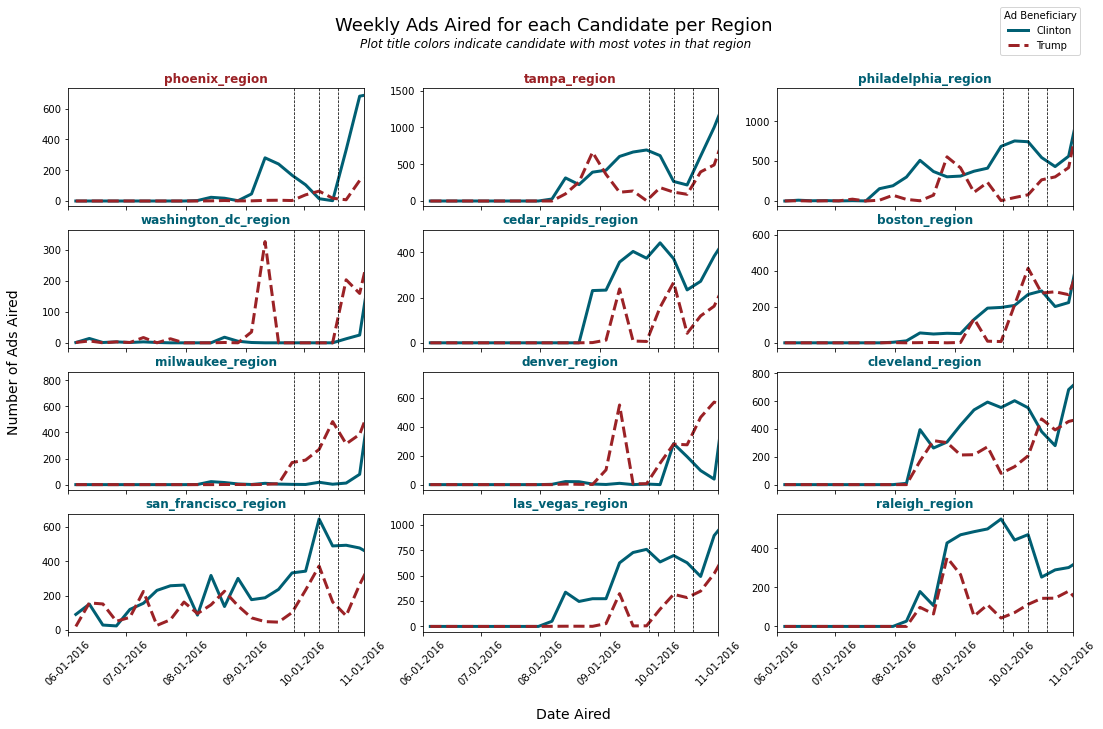

In [72]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%m-%d-%Y')

fig, ax = plt.subplots(4, 3, sharex=True, sharey=False, figsize=(18,10))
rows = range(4)
cols = range(3)

# Region index
r = 0

# Colors for each region based on candidate voted for
reg_colors = {'phoenix_region': '#9B2226',
              'tampa_region': '#9B2226',
              'philadelphia_region': '#005F73',
              'washington_dc_region': '#005F73',
              'cedar_rapids_region': '#005F73',
              'boston_region': '#005F73',
              'milwaukee_region': '#005F73',
              'denver_region': '#005F73',
              'cleveland_region': '#005F73',
              'san_francisco_region': '#005F73',
              'las_vegas_region': '#005F73',
              'raleigh_region': '#005F73'
             }
regions = list(reg_colors.keys())

# Plot Clinton and Trump for each region
for row in rows:
    for col in cols:
        region = regions[r]
        data = plot.loc[region]
        ax[row][col].plot(data.index, data.Clinton, '#005F73', linewidth=3, linestyle='solid')
        ax[row][col].plot(data.index, data.Trump, '#9B2226', linewidth=3, linestyle='dashed')
        
        # Label this subplot
        ax[row][col].set_title(region, fontdict={'fontweight': 'bold'}, color=reg_colors[region])
        
        # X Axis Formatting
        ax[row][col].xaxis.set_major_formatter(myFmt)
        plt.sca(ax[row][col])
        plt.xticks(rotation=45)
        
        # Limit x-axis range
        plt.xlim([datetime.date(2016, 6, 1), datetime.date(2016, 11, 1)])
        
        # Adding vertical lines at dates of debates
        plt.axvline(datetime.datetime(2016, 9, 26), color='black', linestyle='dashed', linewidth=0.75)
        plt.axvline(datetime.datetime(2016, 10, 9), color='black', linestyle='dashed', linewidth=0.75)
        plt.axvline(datetime.datetime(2016, 10, 19), color='black', linestyle='dashed', linewidth=0.75)
        
        r += 1

# Axis Labels & Legend
fig.text(0.078, 0.5, 'Number of Ads Aired', va='center', rotation='vertical', fontsize=14)
fig.text(0.486, 0.0, 'Date Aired', va='bottom', rotation='horizontal', fontsize=14)
fig.legend([ax[0][0].lines[0], ax[0][0].lines[1]], 
           ['Clinton', 'Trump'], title='Ad Beneficiary', 
           bbox_to_anchor=(0.91, 1.0))

fig.suptitle('Weekly Ads Aired for each Candidate per Region', fontsize=18)
fig.text(0.35, 0.95, 'Plot title colors indicate candidate with most votes in that region', va='top', fontsize=12, fontstyle='italic')

# Comment/Uncomment to save plot
plt.savefig('../../../report/JL_figs/weekly_ads_subplots.png', bbox_inches='tight')